In [ ]:
#we are firslty importing pandas and matplotlib libraries for reding .csv/.xlsx files and plotting it in a graph
import pandas as pd
import matplotlib.pyplot as plt
 
 
typ = int(input("please enter a number describing file type you want to upload (101).xlsx (102).csv: "))
 
#this command is to get user choice for file source.
loc = int(input("Please enter a number describing resource location to get file (1)Local Drive (2)Google Drive: "))
 
if loc == 1:
 
  #importing files and io libraries to perform tasks on files and access those
  from google.colab import files
  
  import io
 
  
  if typ == 102:
    uploaded1 = files.upload()
    localDriveFileName1 = input("please enter the exact file name that you have uploaded for first data: ")
    uploaded2 = files.upload()
    localDriveFileName2 = input("please enter the exact file name that you have uploaded for second data: ")
 
    dataFrame1 = pd.read_csv(io.BytesIO(uploaded1[localDriveFileName1]))
    dataFrame2 = pd.read_csv(io.BytesIO(uploaded2[localDriveFileName2]))
 
    xl1 = localDriveFileName1
    xl2 = localDriveFileName2
 
  elif typ == 101:
    uploaded = files.upload()
    localDriveFileName = input("please enter the exact file name that you have uploaded: ")
    dataFrame = pd.ExcelFile(io.BytesIO(uploaded[localDriveFileName]))
    print(dataFrame.sheet_names)
    print("\nWe are going to compare two correlated data here.\nChoose whatever data you want to compare make sure to check date in that data otherwise we will not recieve efficient results. ")
 
    xl1 = input("please type the exact fisrt sheet name you want to use data of for comparision: ")
    xl2 = input("please type the exact second sheet name you want to use data of for comparision: ")
 
    dataFrame1 = dataFrame.parse(xl1)
    dataFrame2 = dataFrame.parse(xl2)
 
elif loc == 2:
  
  print("Click on the link to get authentication to allow Google to access your Drive. You should see a screen with “Google Cloud SDK wants to access your Google Account” at the top. After you allow permission, copy the given verification code and paste it in the box in Colab.")          
  #this will mount google drive with colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  print()
    
  if typ == 102: 
    FileName1 = input("please copy the path of your first .csv file and paste it here,\nyou can do that via going to the left bar and click on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. ")
    FileName2 = input("please copy the path of your second .csv file and paste it here,\nyou can do that via going to the left bar and click on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. ")
 
 
    dataFrame1 = pd.read_csv(FileName1)
    dataFrame2 = pd.read_csv(FileName2)
 
    xl1 = input("please put a name for your first .csv file: ")
    xl2 = input("please put a name for your second .csv file: ")
 
    
  elif typ == 101:
    FileName = input("please copy the path of your .xlsx file and paste it here,\nyou can do that via going to the left bar and click on the folder icon,\nthen go to your monted drive and go to your file,\nthen right click there and copy the path. ")
    print("\nLoading data...\n")

    dataFrame = pd.ExcelFile(FileName)
    print(dataFrame.sheet_names)
 
    print("\nWe are going to compare two correlated data here.\nChoose whatever data you want to compare make sure to check date in that data otherwise we will not recieve efficient results. ")
 
    xl1 = input("please type the exact fisrt sheet name you want to use data of for comparision: ")
    xl2 = input("please type the exact second sheet name you want to use data of for comparision: ")
 
    dataFrame1 = dataFrame.parse(xl1)
    dataFrame2 = dataFrame.parse(xl2)

please enter a number describing file type you want to upload (101).xlsx (102).csv: 101
Please enter a number describing resource location to get file (1)Local Drive (2)Google Drive: 2
Click on the link to get authentication to allow Google to access your Drive. You should see a screen with “Google Cloud SDK wants to access your Google Account” at the top. After you allow permission, copy the given verification code and paste it in the box in Colab.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive

please co

In [ ]:
print()
print(xl1,": ",dataFrame1.columns)

print()
print(xl2,": ",dataFrame2.columns)

plot1 = input("please enter the correct option from the above column names you want to compare against for X axis.\nThe 'date' option is required and must be available in both data and have to be same: ")
plot2a = input("please enter the correct option from the above column names you want to compare against for y axis in the fisrt data name,\nplease choose numerical data: ")
plot2b = input("please enter the correct option from the above column names you want to compare against for y axis in the second data name,\nplease choose numerical data: ")



Fitbit_Steps_IntraDay :  Index(['Unnamed: 0', 'time', 'value', 'date'], dtype='object')

Fitbit_Calories_IntraDay :  Index(['Unnamed: 0', 'level', 'mets', 'time', 'value', 'date'], dtype='object')
please enter the correct option from the above column names you want to compare against for X axis.
The 'date' option is required and must be available in both data and have to be same: date
please enter the correct option from the above column names you want to compare against for y axis in the fisrt data name,
please choose numerical data: value
please enter the correct option from the above column names you want to compare against for y axis in the second data name,
please choose numerical data: value


In [ ]:
value1 = xl1+" "+plot2a
value2 = xl2+" "+plot2b

dataFrame3 = { value1: dataFrame1[plot2a], value2: dataFrame2[plot2b]}
dataFrame3 = pd.DataFrame(dataFrame3)
  
dataFrame3 = dataFrame3.loc[dataFrame3[value1] != 0]
dataFrame3 = dataFrame3.loc[dataFrame3[value2] != 0]

print(dataFrame3)

       Fitbit_Steps_IntraDay value  Fitbit_Calories_IntraDay value
8609                            17                         3.07188
8623                            24                         3.07188
8624                            17                         3.29130
8626                            15                         3.51072
8628                            15                         3.07188
...                            ...                             ...
41583                           67                         5.90598
41584                           31                         3.93732
41585                           26                         3.28110
41586                           15                         3.06236
41587                            9                         2.84362

[6774 rows x 2 columns]


In [ ]:
print("Pearson correlation coefficient:")
dataFrame3.corr(method ='pearson') 

Pearson correlation coefficient:


,Fitbit_Steps_IntraDay value,Fitbit_Calories_IntraDay value
Fitbit_Steps_IntraDay value,1.000000,0.808823
Fitbit_Calories_IntraDay value,0.808823,1.000000


In [ ]:
import numpy as np
from numpy import mean
from numpy.linalg import svd

Mean1 = mean(dataFrame3[value1])
Mean2 = mean(dataFrame3[value2])
print(Mean1)
print(Mean2)

dataFrame3[value1] = dataFrame3[value1] - Mean1
dataFrame3[value2] = dataFrame3[value2] - Mean2

print(dataFrame3)


4.027483985522402e-15
-6.57939077362744e-14
       Fitbit_Calories_IntraDay value  Fitbit_Steps_IntraDay value
8609                        -0.986627                   -12.637585
8623                        -0.986627                    -5.637585
8624                        -0.767207                   -12.637585
8626                        -0.547787                   -14.637585
8628                        -0.986627                   -14.637585
...                               ...                          ...
41583                        1.847473                    37.362415
41584                       -0.121187                     1.362415
41585                       -0.777407                    -3.637585
41586                       -0.996147                   -14.637585
41587                       -1.214887                   -20.637585

[6774 rows x 2 columns]


In [ ]:
dataFrame3 = dataFrame3.transpose()
print(dataFrame3)

                                    8609      8623   ...      41586      41587
Fitbit_Calories_IntraDay value  -0.986627 -0.986627  ...  -0.996147  -1.214887
Fitbit_Steps_IntraDay value    -12.637585 -5.637585  ... -14.637585 -20.637585

[2 rows x 6774 columns]


In [ ]:

U,S,VT = svd(dataFrame3,full_matrices=False)
print(U)
print()
print(S)
print()
print(VT)
print()


[[-0.04080541 -0.99916711]
 [-0.99916711  0.04080541]]

[2025.78637974   59.99711451]

[[0.00625304 0.00280047 0.00624862 ... 0.0018098  0.00723968 0.01020343]
 [0.00783576 0.01259662 0.00418163 ... 0.01047261 0.00663406 0.00619613]]



In [ ]:
dataFrame3 = dataFrame3.transpose()

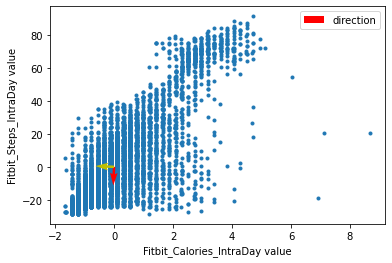

<Figure size 432x288 with 0 Axes>

In [ ]:
 
plt.plot(dataFrame3[value1], dataFrame3[value2], '.',zorder=0)

plt.quiver(Mean1,Mean2, U[0][0], U[0][1], color=['r'],zorder=1,label="direction")
plt.legend()
plt.quiver(Mean1,Mean2, U[1][0], U[1][1], color=['y'],zorder=1)
plt.xlabel(value1)
plt.ylabel(value2)
plt.figure()
plt.show()

No handles with labels found to put in legend.


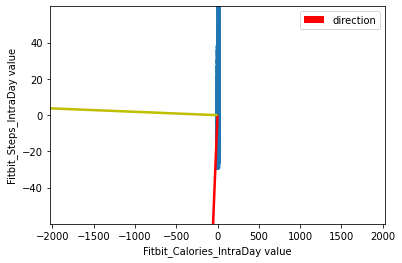

<Figure size 432x288 with 0 Axes>

In [ ]:
 
plt.plot(dataFrame3[value1],dataFrame3[value2], '.',zorder=0)
plt.legend()
 
plt.quiver(Mean1,Mean2, U[0][0], U[0][1], color=['r'],scale = 1/S[0],zorder=1,label = "direction")
plt.legend()
plt.quiver(Mean1,Mean2, U[1][0], U[1][1], color=['y'],scale = 1/S[1],zorder=1)
plt.xlim(-S[0],S[0])
plt.ylim(-S[1],S[1])
plt.xlabel(value1)
plt.ylabel(value2)
plt.figure()
plt.show()